# Machine Learning - Exercise 1
# Classification Evaluation

This exercise illustrates examples of evaluation of solutions of classification problems.

## Import libraries

Import libraries that contains the implementations of the functions used in the rest of the program.



In [212]:
import random
import numpy as np
import pandas as pd
import sklearn.metrics 
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    ax.set_ylim(len(classes)-0.5, -0.5)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

print("Libraries imported.")

Libraries imported.


## Load data

Load training data.

Choose one of the datasets described in the next subsections.

More details on these datasets are available in https://scikit-learn.org/stable/datasets/toy_dataset.html


### IRIS dataset

In [189]:
DB = datasets.load_iris()
dataset_name = "Iris"
class_names = np.array([str(c) for c in DB.target_names])
X_all = DB.data
y_all = DB.target

### Wine dataset

In [190]:
DB = datasets.load_wine()
dataset_name = "Wines"
class_names = np.array([str(c) for c in DB.target_names])
X_all = DB.data
y_all = DB.target

### Digits dataset

In [213]:
DB = datasets.load_digits()
dataset_name = "Digits"
class_names = np.array([str(c) for c in DB.target_names])
X_all = DB.data
y_all = DB.target

### Unbalanced Digits dataset

Adapted from the Digits dataset with digit 0 mapped to class '0' and all other digits mapped to class '1'

In [192]:
# Binary Digits unbalanced
DB = datasets.load_digits()
dataset_name = "Digits_01_unbalanced"
class_names = np.array(["0","1"])
X_all = DB.data
y_all = DB.target
cont = 0
for i in range(0,len(y_all)):
  if y_all[i] != 0:
    y_all[i] = 1
    cont += 1
print(F"Percentage of non-zero digits: {cont/len(y_all)} ({cont} samples)")
print(F"Percentage of zero digits: {1 - cont/len(y_all)} ({len(y_all) - cont} samples)")

Percentage of non-zero digits: 0.900946021146355 (1619 samples)
Percentage of zero digits: 0.09905397885364498 (178 samples)


### Summary of the dataset

Print some information about the dataset.

Data structures

    Input X: array ( n x m )
    Output Y: array ( n x 1 )

In [214]:
print("Dataset: %s" %(dataset_name))
print("Input shape: %s" %str(X_all.shape))
print("Output shape: %s" %str(y_all.shape))
print("Number of attributes/features: %d" %(X_all.shape[1]))
print("Number of classes: %d %s" %(len(class_names), str(class_names)))
print("Number of samples: %d" %(X_all.shape[0]))

Dataset: Digits
Input shape: (1797, 64)
Output shape: (1797,)
Number of attributes/features: 64
Number of classes: 10 ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Number of samples: 1797


### Show an example

Display a random sample.

In [215]:
id = random.randrange(0,X_all.shape[0])

print("Input x at position %d is: %r" %(id,X_all[id]))
print("Output y at position %d is: %r ['%s']" %(id,y_all[id],class_names[y_all[id]]))

Input x at position 1445 is: array([ 0.,  0.,  2., 12.,  7.,  0.,  0.,  0.,  0.,  0., 15., 14., 15.,
        6.,  0.,  0.,  0.,  6., 10.,  4.,  2., 14.,  1.,  0.,  0.,  8.,
        8.,  0.,  0.,  8.,  5.,  0.,  0.,  7.,  8.,  0.,  0.,  4.,  8.,
        0.,  0.,  2., 14.,  0.,  0.,  5.,  6.,  0.,  0.,  0.,  9., 12.,
        4., 14.,  3.,  0.,  0.,  0.,  1., 13., 15.,  9.,  0.,  0.])
Output y at position 1445 is: 0 ['0']


## Split data

Split the data set "X_all" in training set `X_train`, `y_train` and test set `X_test`, `y_test`, using `test_size` to denote percentage of samples in the test set.

Note:
`random_state` parameter is used as random seed. Change this value to generate a different split.

IMPORTANT: solution will depend on this data split.


In [216]:
# Given a certain percentage, we split the input/output vectors for training and testing.
# EXAMPLE: Let's consider we have a shape of 1000 samples.
# If we consider splitting 33% for the testing dataset, it means that the vector X (input)
# and vector Y (output) will be splitted in 670 samples for training and 230 for testing.

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.333, 
                                                    random_state=117)

print("Size of training set: %d" %X_train.shape[0])
print("Size of test set: %d" %X_test.shape[0])

print('First training sample')
id = 0
print("    x_train_%d = %r" %(id,X_train[id]))
print("    y_train_%d = %r ['%s']" %(id,y_train[id],class_names[y_train[id]]))

print('First test sample')
id = 0
print("    x_test_%d = %r" %(id,X_test[id]))
print("    y_test_%d = %r ['%s']" %(id,y_test[id],class_names[y_test[id]]))


Size of training set: 1198
Size of test set: 599
First training sample
    x_train_0 = array([ 0.,  0.,  1., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  2.,
        0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
       14.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 16., 12., 15., 15.,  7.,
        0.,  0.,  0., 14., 14.,  6.,  4., 14.,  1.,  0.,  0.,  9., 14.,
        3.,  4., 14.,  2.,  0.,  0.,  1.,  7., 14., 16., 11.,  0.])
    y_train_0 = 6 ['6']
First test sample
    x_test_0 = array([ 0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,
        0.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
        8., 13.,  8.,  2.,  0.,  0.,  0.,  0., 13., 16., 13., 14.,  4.,
        0.,  0.,  0., 11.,  8.,  2.,  3., 13.,  0.,  0.,  0.,  7., 11.,
        5., 12., 11.,  0.,  0.,  0.,  1., 11., 12.,  4.,  0.,  0.])
    y_test_0 = 6 ['6']


## Create a Model 

Define the model that will be used for learning.

Create an instance of a class implementing a classification method.



**Decision Trees**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [217]:
model = tree.DecisionTreeClassifier()

**Support Vector Machines**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svm%20svc#sklearn.svm.SVC

In [197]:
# C = 1 -> Regularization parameter
# Kernel = 'linear' -> Specifies the kernel type to be used in the algorithm (‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’)
model = svm.SVC(kernel='linear', C=1)

Probabilistic generative model 

**Gaussian Naive Bayes**

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussiannb#sklearn.naive_bayes.GaussianNB


In [198]:
model = GaussianNB()

Probabilistic discriminative model

**Logistic regression**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression


In [199]:
# We set max_iter to '1500' otherwise the method won't converge.
# NOTE: This might depend on the computational power of your machine; Change accordingly.
model = LogisticRegression(max_iter=1500)

## Fit the model

Finding a solution for this model given the data set.
The solution is stored in the model object.


In [218]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

### Plot the decision tree


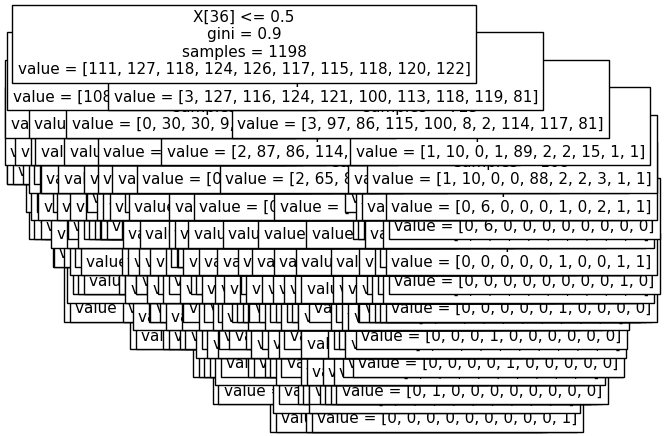

In [219]:
# This cell can only be executed if we have chosen a DecisionTrees model.
if isinstance(model, tree.DecisionTreeClassifier):
  tree.plot_tree(model,fontsize=11)
  plt.rcParams["figure.figsize"] = (3,3)
  plt.show()
else:
  print("Please, select the DecisionTree model first, then re-execute this cell.")

## Predict on test set

Use test set for prediction.

In [220]:
# X_test contains the inputs reserved for testing purposes.
# This was done above at cell n.9.
y_pred = model.predict(X_test)

# y_pred is the prediction vector generated by the model,
# while y_test is the ground-truth vector for the x_test vector.
print(F"Shape of 'y_pred': {y_pred.shape[0]}")
print(F"Shape of 'y_test': {y_test.shape[0]}")

Shape of 'y_pred': 599
Shape of 'y_test': 599


#### Use this statement to generate a prediction vector of all values '1' useful to test performance with the Unblanced Digits dataset.



In [203]:
# Result of model that predicts only 1 (for unbalanced digits)
y_pred = np.ones(len(X_test))

## Evaluate the Model

Evaluation of a specific solution on the test set, comparing predicted values `y_pred` with ground-truth test values `y_test`.

### Accuracy

In [221]:
# By default, the score method does not need the actual predictions. So, when we call this function
# it makes predictions using X_test under the hood and uses those predictions to calculate the accuracy score.
acc = model.score(X_test, y_test)
print("Accuracy %.4f" %acc)

Accuracy 0.8514


### Precision & Recall

Classification report contains more accurate performance information.

In [222]:
print(classification_report(y_test, y_pred, labels=None, target_names=class_names, digits=3))


              precision    recall  f1-score   support

           0      0.956     0.970     0.963        67
           1      0.763     0.818     0.789        55
           2      0.836     0.864     0.850        59
           3      0.775     0.932     0.846        59
           4      0.860     0.782     0.819        55
           5      0.950     0.877     0.912        65
           6      0.968     0.909     0.937        66
           7      0.871     0.885     0.878        61
           8      0.720     0.667     0.692        54
           9      0.786     0.759     0.772        58

    accuracy                          0.851       599
   macro avg      0.848     0.846     0.846       599
weighted avg      0.854     0.851     0.851       599



### Confusion Matrix

Shows the results in a graphical form.

[[65  0  0  0  1  0  0  0  1  0]
 [ 0 45  2  0  0  0  0  1  4  3]
 [ 0  1 51  3  0  0  1  0  1  2]
 [ 0  0  0 55  0  1  0  1  1  1]
 [ 0  3  0  1 43  0  1  3  3  1]
 [ 1  1  0  3  1 57  0  1  0  1]
 [ 0  2  1  0  1  2 60  0  0  0]
 [ 0  1  0  1  4  0  0 54  1  0]
 [ 2  4  4  2  0  0  0  2 36  4]
 [ 0  2  3  6  0  0  0  0  3 44]]


<AxesSubplot: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

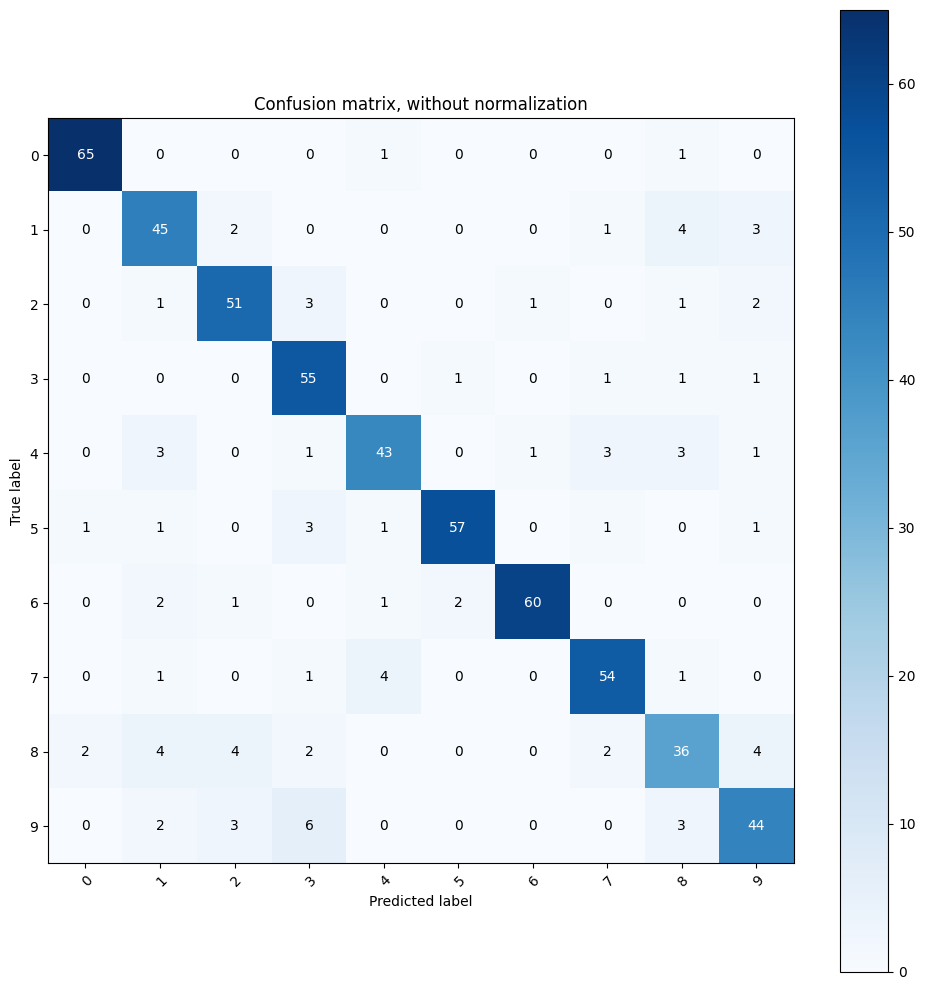

In [223]:
cm = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print(cm)
plt.rcParams["figure.figsize"] = (10,10)
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=False)

## Evaluate a specific instance of a method

Evaluation of a specific method with instantiated hyper-parameters
through Cross Validation



In [224]:
# K-Fold Cross Validation 
cv = ShuffleSplit(n_splits=5, test_size=0.333, random_state=15)
scores = cross_val_score(model, X_all, y_all, cv=cv)
print(scores)
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.85308848 0.8263773  0.84641068 0.82971619 0.86811352]
Accuracy: 0.845 (+/- 0.03)


## Prediction of a new sample

In [225]:
if dataset_name == "Iris":
  xnew = np.array([8.5, 2.6, 9.2, 0.3])
elif dataset_name == "Wines":
  xnew = np.array([12, 2.5, 2.6, 15, 186, 1.5, 9.1,
                   0.44, 2.2, 5.6, 2.9, 3.7, 380])
elif dataset_name == "Digits" or dataset_name == "Digits_01_unbalanced":
   xnew = np.array([  
        0,  0,  8, 13, 18, 13, 11,  1,  0, 10,  9,  4,  6,
       16,  3,  0,  0,  0,  0, 10,  1, 13,  0,  0,  0,  0,
        0,  7, 14,  2,  0,  0,  0,  0,  0,  7, 13,  1,  0,
        0,  0,  0,  0,  0,  8, 13,  1,  0,  0,  0,  0,  0,
       13,  6,  7,  1,  0,  0, 14, 12, 13,  1,  0,  0])
 
xnew = xnew.reshape(1,-1)
print("New input 'x_new' = %r" %(xnew))

# Let the model predict a vector over this new input
ynew = model.predict(xnew)

print("Prediction of this new input 'x_new' = %d %s" %(ynew,class_names[ynew]))

# only for probabilistic models
try:
  mconf = np.max(model.predict_proba(xnew))
  print("Confidence: %.2f" %(mconf))
except:
  pass  

New input 'x_new' = array([[ 0,  0,  8, 13, 18, 13, 11,  1,  0, 10,  9,  4,  6, 16,  3,  0,
         0,  0,  0, 10,  1, 13,  0,  0,  0,  0,  0,  7, 14,  2,  0,  0,
         0,  0,  0,  7, 13,  1,  0,  0,  0,  0,  0,  0,  8, 13,  1,  0,
         0,  0,  0,  0, 13,  6,  7,  1,  0,  0, 14, 12, 13,  1,  0,  0]])
Prediction of this new input 'x_new' = 8 ['8']
Confidence: 1.00


## Common Mistake

Evaluate solution on data used for training!!! (This was pointed out at cell n.18)


In [228]:
model.score(X_all,y_all)

0.9504730105731776

## Home Exercises

**Question 1**

Design an evaluation procedure to assess and compare the different performance of the classifcation models seen above on the Digits dataset

In [229]:
def generatePredictions(model):
    # We fit the model first, letting it find a solution.
    model.fit(X_train, y_train)
    
    # X_test contains the inputs reserved for testing purposes.
    # This was done above at cell n.9.
    y_pred = model.predict(X_test)
    
    acc = model.score(X_test, y_test)
    
    return acc

df = pd.DataFrame({'Model': ["Decision Tree","SVC","GaussianNB","LogisticRegression"], 'Accuracy': [0,0,0,0]})

print("Predictions for the Digits Dataset, using different classifiers:")

### ==== DECISION TREE ==== ###
modelDecisionTree = tree.DecisionTreeClassifier()
df.loc[0, 'Accuracy']  = generatePredictions(modelDecisionTree)

### ========= SVC ======== ###
modelSVC = svm.SVC(kernel='linear', C=1)
df.loc[1, 'Accuracy'] = generatePredictions(modelSVC)

### ===== GaussianNB ===== ###
modelGaussianNB = GaussianNB()
df.loc[2, 'Accuracy'] = generatePredictions(modelGaussianNB)

### ==== LogisticRegression ==== ###
modelLogisticRegression = LogisticRegression(max_iter=1500)
df.loc[3, 'Accuracy'] = generatePredictions(modelLogisticRegression)

max_value = df["Accuracy"].max()

for index, row in df.iterrows():
    modelName = row['Model']
    accuracy = row['Accuracy']

    if(max_value == accuracy):
        print(F"\t- Accuracy for {modelName} model: {accuracy:.3f} [BEST]")
    else:
        print(F"\t- Accuracy for {modelName} model: {accuracy:.3f}")

Predictions for the Digits Dataset, using different classifiers:
	- Accuracy for Decision Tree model: 0.851
	- Accuracy for SVC model: 0.978 [BEST]
	- Accuracy for GaussianNB model: 0.815
	- Accuracy for LogisticRegression model: 0.958


**Question 2** 

Consider the Unbalanced Digits dataset and compare one of the above classification method with the classifier that always returns the most common label in the dataset. 
Which performance metrics are significant in this comparison?

```
Most probable answer // To be checked: The most significant performance metric while comparing the ModelDummy with the SVG model over the Unbalanced Digits Dataset, is the Confusion Matrix which visually represents how the SVG model can correctly predict also inputs with the ['0'] class, something that the ModelDummy doesn't do.
```

Accuracy for modelDummy: 0.8915
Classification report for modelDummy:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        65
           1      0.891     1.000     0.943       534

    accuracy                          0.891       599
   macro avg      0.446     0.500     0.471       599
weighted avg      0.795     0.891     0.840       599


Classification report for SVG model:
              precision    recall  f1-score   support

           0      0.912     0.954     0.932        65
           1      0.994     0.989     0.992       534

    accuracy                          0.985       599
   macro avg      0.953     0.971     0.962       599
weighted avg      0.985     0.985     0.985       599



C:\Users\Gianmarco\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gianmarco\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gianmarco\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: title={'center': 'CM for SVG'}, xlabel='Predicted label', ylabel='True label'>

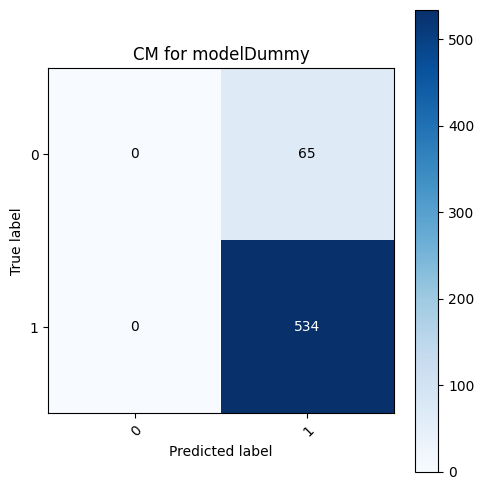

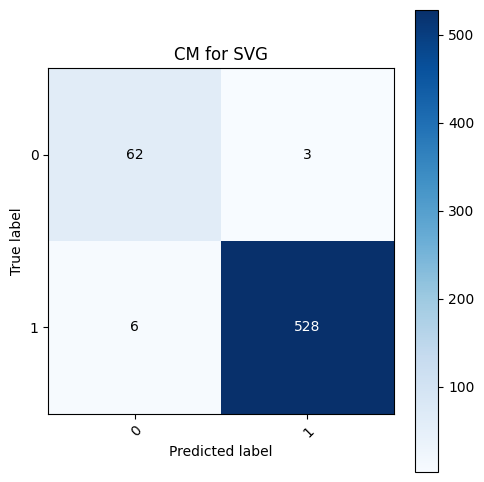

In [230]:
# Binary Digits unbalanced
DB = datasets.load_digits()
dataset_name = "Digits_01_unbalanced"
class_names = np.array(["0","1"])
X_all = DB.data
y_all = DB.target
cont = 0
for i in range(0,len(y_all)):
  if y_all[i] != 0:
    y_all[i] = 1
    cont += 1
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.333, 
                                                    random_state=random.seed())

# Model Dummy -> This model always returns the most common label in the dataset.                                                    
modelDummy = DummyClassifier(strategy = "most_frequent", random_state = random.seed())

# We fit the model first, letting it find a solution.
modelDummy.fit(X_train, y_train)

# X_test contains the inputs reserved for testing purposes.
# This was done above at cell n.9.
y_pred = modelDummy.predict(X_test)
acc = modelDummy.score(X_test, y_test)
print(F"Accuracy for modelDummy: {acc:.4f}")
print("Classification report for modelDummy:")
print(classification_report(y_test, y_pred, labels=None, target_names=class_names, digits=3))
plt.rcParams["figure.figsize"] = (5,5)
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=False, title="CM for modelDummy")

print("===========================================================\n")

# SVG Model for the Unbalanced Digits
modelDecisionTree = tree.DecisionTreeClassifier()
generatePredictions(modelDecisionTree)
print("Classification report for SVG model:")
print(classification_report(y_test, modelDecisionTree.predict(X_test), labels=None, target_names=class_names, digits=3))
plt.rcParams["figure.figsize"] = (5,5)
plot_confusion_matrix(y_test, modelDecisionTree.predict(X_test), classes=class_names, normalize=False, title="CM for SVG")